In [62]:
# Try Jupyter, powered by JupyterLite
#Y = A*$x^3 + Bx^2 + $Cx + $D
#x 1.2 ,1.4 ,1.6 , 1.8 ,2.0 ,2.2 ,2.4  ,2.6  ,2.8  ,3
#Y 1.5 ,2.7 ,3.9 , 5.5 ,7.1 ,9.1 ,11.1 ,12.9 ,15.5 ,17.9

#>**Определить линию регрессии
#Рассчитать коэффициент корреляции
#Подобрать функциональную зависимость заданного вида
#Вычислить коэффициент регрессии

#Построить график экспериментальной зависимости,
#линию регрессии, подобранной зависимости.

#Определить суммарную квадратичную ошибку и
#среднюю ошибку для линии регрессии и 
#подобранной функциональной зависимости.

In [63]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

In [64]:
X = [1.2 ,1.4 ,1.6 , 1.8 ,2.0 ,2.2 ,2.4  ,2.6  ,2.8  ,3]
Y = [1.5 ,2.7 ,3.9 , 5.5 ,7.1 ,9.1 ,11.1 ,12.9 ,15.5 ,17.9]

X = np.array(X , dtype=float)
Y = np.array(Y , dtype=float)

In [65]:
def getxySum(X , Y , powr):
    sum = 0
    for i in range(len(X)):
        sum+=pow(X[i] , powr)*Y[i]
    return sum
    
def getCoef(X , Y , n):
    A = []
    for i in range(n+1):
        inA = []
        maxPow = n+n-i
        for j in range(n+1):            
            inA.append(sum( pow(k , maxPow) for k in X))
            if j==n:
                inA.append(getxySum(X , Y ,maxPow))
            maxPow -=1            
        A.append(inA)
    return A
    
def gaussMethod(Matrix):
    for numRow in range(len(Matrix)):
        baseElem = numRow + np.argmax(abs(Matrix[numRow:, numRow]))
        if baseElem != numRow:
            Matrix[[numRow, baseElem]] = Matrix[[baseElem, numRow]]
        row = Matrix[numRow]
        diagElem = row[numRow]
        if abs(diagElem) < 1e-10:
            print("Incorrect matrix")
            return Matrix
        row /= diagElem
        for lowRow in Matrix[numRow+1:]:
            n = lowRow[numRow]
            lowRow -= n*row
    for numRow in range(len(Matrix)-1,0,-1):
        row = Matrix[numRow]
        for upRow in Matrix[:numRow]:
            n = upRow[numRow]
            upRow -= n*row

    newMatrix = []
    for rows in Matrix:
        newMatrix.append(rows[len(rows)-1])

    return newMatrix

def getFunc(X , Cfs):
    y = []
    for i in X:
        y.append( Cfs[0]*pow(i ,3) + Cfs[1]*pow(i ,2) + Cfs[2]*pow(i ,1) + Cfs[3])
    return y

def getS(Cfs , X , Y):
    res = 0
    for i in range(len(X)):
        res += pow(Cfs[0]*pow(X[i] ,3) + Cfs[1]*pow(X[i] ,2) + Cfs[2]*pow(X[i] ,1) + Cfs[3] - Y[i] , 2)
    return res
def getCC(X , Y):
    Mx = sum( k for k in X)/len(X)
    My = sum( k for k in Y)/len(Y)
    res = 0
    for i in range(len(X)):
        res+=(X[i]-Mx)*(Y[i]-My)
        
    div = pow(sum(pow(k-Mx,2) for k in X)*sum(pow(k-My,2) for k in Y),0.5)
    
    return res/div

def getRegLine(X , Y):
    a1 = (len(X)*getxySum(X , Y , 1)-sum(y for y in Y)*sum(x for x in X))/(len(X)*sum(x*x for x in X)-pow(sum(x for x in X),2))
    a0 = (sum(y for y in Y)/len(X))-(a1*sum(x for x in X)/len(X))
    print(f"Lenar regration = {a0} + {a1}x")
    y = []
    for i in X:
        y.append(a0+a1*i)        
    return y

In [66]:
A = np.array(getCoef(X , Y , 3) , dtype=float)
Coefs = gaussMethod(A)
print(f"The sum of the squared deviations = {getS(Coefs , X , Y)} \n")
print(f"Correlation coefficient = {getCC(X , Y)} \n")
regY = getRegLine(X , Y)
resY = getFunc(X ,Coefs)

The sum of the squared deviations = 0.097072261072262 

Correlation coefficient = 0.9935655811975616 

Lenar regration = -10.434545454545454 + 9.121212121212121x


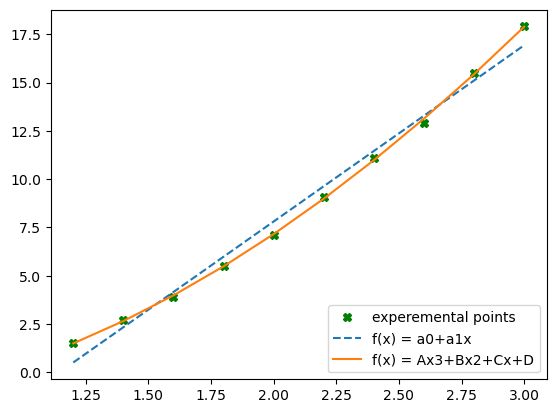

In [67]:
fig , ax = plt.subplots()
ax.plot(X , Y ,'gX' , label = 'experemental points')
ax.plot(X , regY , linestyle = '--'  , label = 'f(x) = a0+a1x')
ax.plot(X , resY , label = 'f(x) = Ax3+Bx2+Cx+D')
ax.legend(loc = 'lower right')